In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Прочтем данные и посмотрим на них

посмотрим на начало нашего датасета

In [173]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


посмотрим некоторую информацию и статистику о датасете

In [174]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


посмотрим на данные и убедимся, что нет пропущенных значений

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [176]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

посмотрим какой шанс выжить на титанике в зависимости от класса и пола 

In [231]:
df.pivot_table('Survived', index='Sex', columns='Pclass',
    margins=True)

Pclass,1,2,3,All
Sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


видим, что есть довольно много пропущенных значений в колонке Cabin и часть отсутствует в колонке Age, поэтому придется немного обработать эти данные

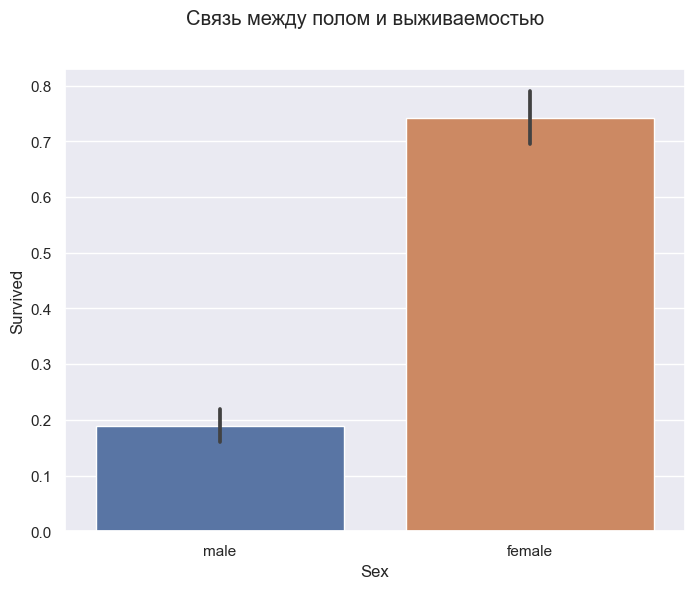

In [223]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='Sex', y='Survived', data=df.reset_index())
fig.suptitle('Связь между полом и выживаемостью')
plt.show()

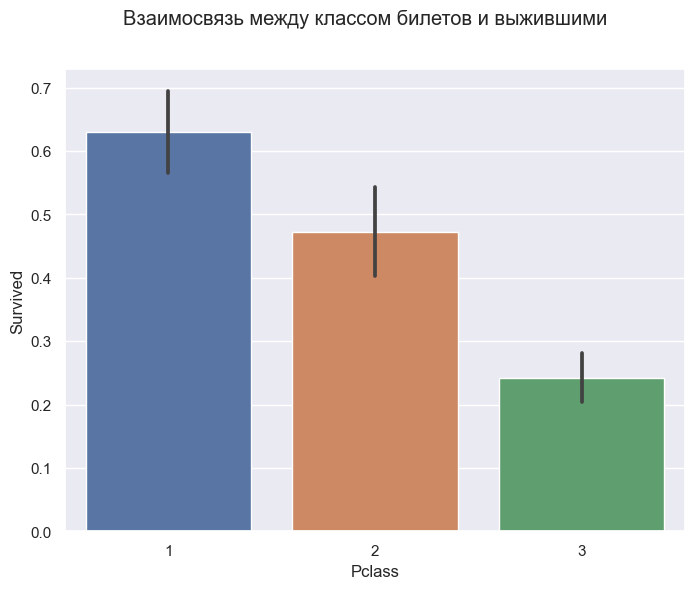

In [224]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='Pclass', y='Survived', data=df.reset_index())
fig.suptitle('Взаимосвязь между классом билетов и выжившими')
plt.show()

In [178]:
Sex_female = df['Sex'].unique().tolist() 
age = []
for i in Sex_female: 
    a = df.loc[df['Sex'] == i]['Age'].median()
    age.append(a)
age_dict = dict(zip(Sex_female, age)) 
df['Age'] = df['Age'].fillna(df['Sex'].map(age_dict))

In [179]:
X = df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df.Survived

In [180]:
X = pd.get_dummies(X)

In [181]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,27.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


# Обучим наше дерево решений

подгрузим из sklearn дерево решений, разделим данные на тренировочные и тестовые и передадим в дерево

In [265]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [266]:
cross_val_score(clf, X_train, y_train , cv=5).mean() 

0.7903081232492998

посмотрим на переобучение и недообучение и понимаем, что необходимо добавить кроссвалидацю

In [269]:
max_depth_values = range(1, 100)
cross_val_scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train , cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    cross_val_scores_data = pd.concat([cross_val_scores_data, temp_score_data])

In [270]:
cross_val_scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.790308
0,5,0.842282,0.810169,0.805434


видим что лучшая глубина дерева - 5

<AxesSubplot:xlabel='max_depth', ylabel='score'>

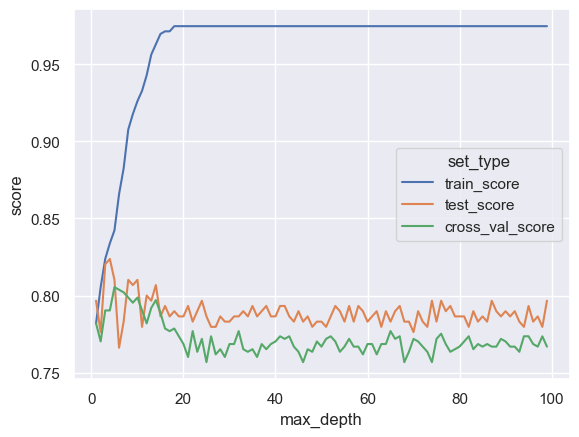

In [271]:
cross_val_scores_data_long = pd.melt(cross_val_scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
        var_name='set_type', value_name='score')
sns.lineplot(x="max_depth", y="score", hue="set_type", data=cross_val_scores_data_long)

In [280]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)

0.8067796610169492

In [281]:
cross_val_scores_data_long.sort_values('score', ascending=False).groupby('set_type').head(1)

,max_depth,set_type,score
58,59,train_score,0.974832
102,4,test_score,0.823729
202,5,cross_val_score,0.805434


[Text(0.525, 0.9166666666666666, 'Sex_male <= 0.5\nentropy = 0.953\nsamples = 596\nvalue = [374, 222]'),
 Text(0.3, 0.75, 'Pclass <= 2.5\nentropy = 0.851\nsamples = 206\nvalue = [57, 149]'),
 Text(0.13333333333333333, 0.5833333333333334, 'Age <= 2.5\nentropy = 0.23\nsamples = 107\nvalue = [4, 103]'),
 Text(0.06666666666666667, 0.4166666666666667, 'Parch <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.03333333333333333, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2, 0.4166666666666667, 'Age <= 24.5\nentropy = 0.187\nsamples = 105\nvalue = [3, 102]'),
 Text(0.16666666666666666, 0.25, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34]'),
 Text(0.23333333333333334, 0.25, 'Age <= 26.0\nentropy = 0.253\nsamples = 71\nvalue = [3, 68]'),
 Text(0.2, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.26666666666666666, 0.08333333333333333, 'entropy = 0.187\nsamples = 70\nvalue = [2,

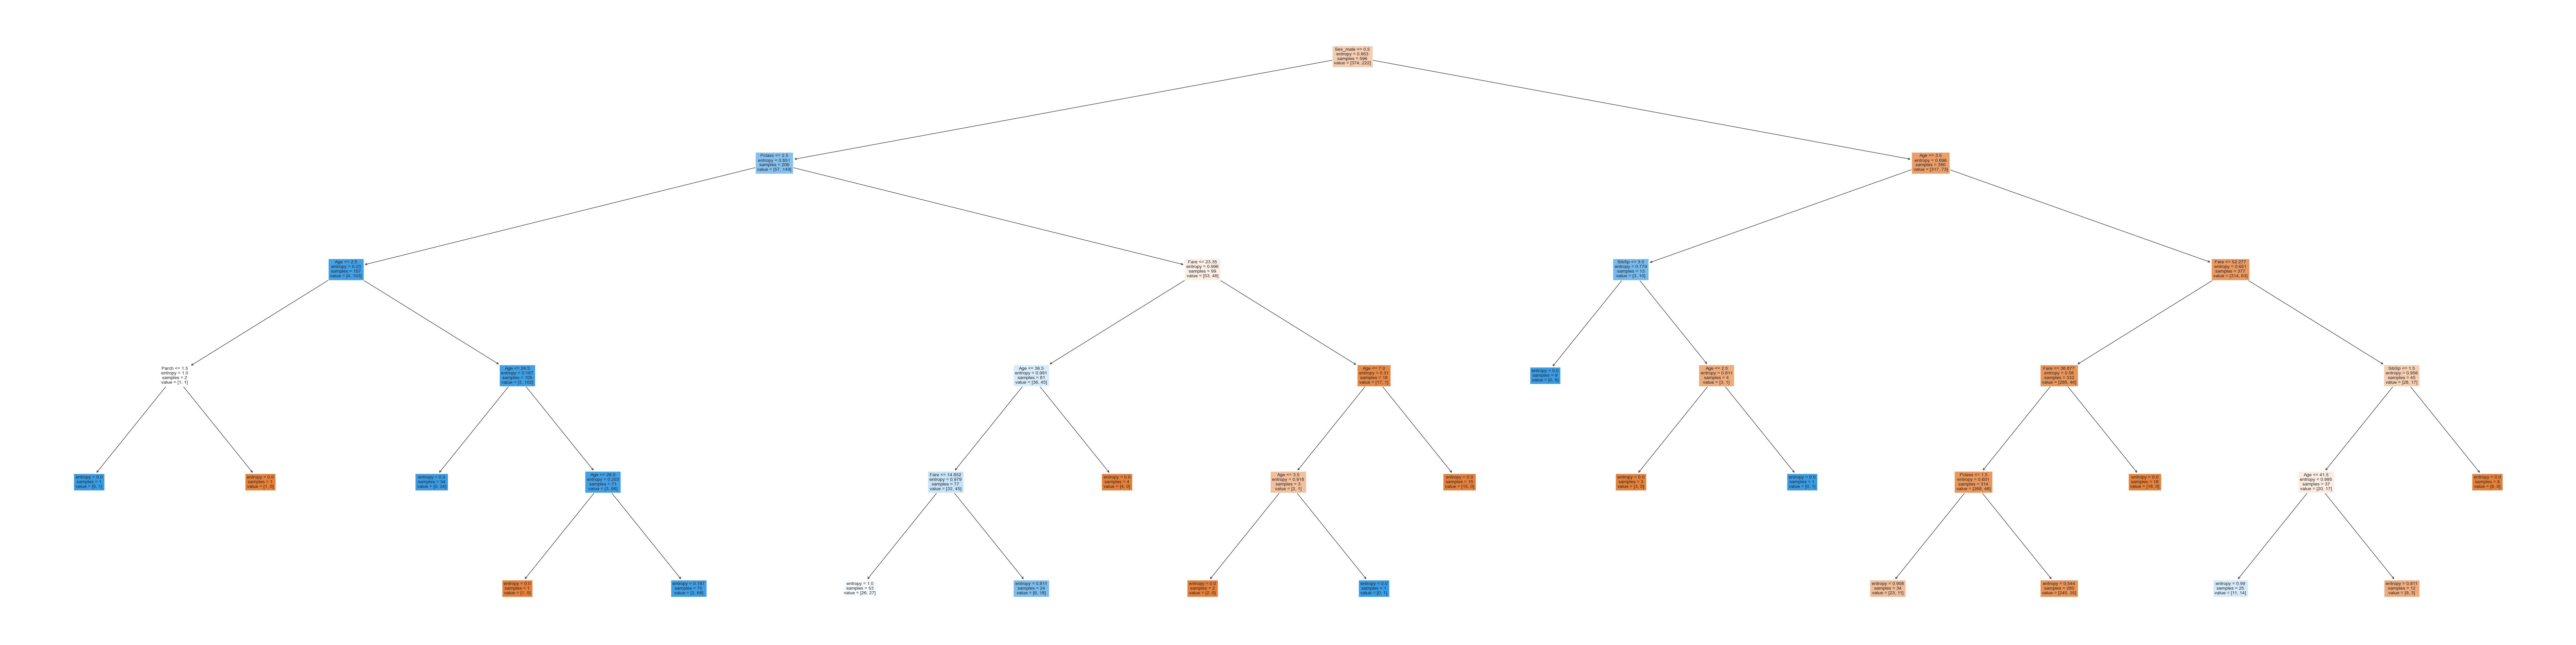

In [295]:
plt.figure(figsize=(100, 25))
tree.plot_tree(best_clf, fontsize=10, feature_names=list(X), filled=True)